In [75]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Image Acquisition

In [76]:
imgpath="D:\\Minor project college\\Datasets\\yes\\Y4.jpg"

In [77]:
img=cv2.imread(imgpath,1)


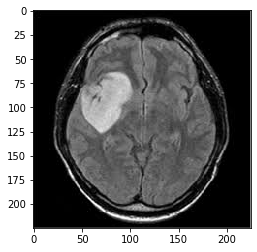

In [78]:
plt.imshow(img)

In [79]:
print(img) # It will print the array matrix of the image row indicate the pixel and column indicate intensity of colour

[[[190 190 190]
  [110 110 110]
  [137 137 137]
  ...
  [129 129 129]
  [129 129 129]
  [174 174 174]]

 [[108 108 108]
  [  5   5   5]
  [ 11  11  11]
  ...
  [  1   1   1]
  [  1   1   1]
  [125 125 125]]

 [[139 139 139]
  [  9   9   9]
  [  0   0   0]
  ...
  [  1   1   1]
  [  1   1   1]
  [131 131 131]]

 ...

 [[127 127 127]
  [  2   2   2]
  [  4   4   4]
  ...
  [  0   0   0]
  [  0   0   0]
  [130 130 130]]

 [[127 127 127]
  [  2   2   2]
  [  4   4   4]
  ...
  [  0   0   0]
  [  0   0   0]
  [130 130 130]]

 [[137 137 137]
  [ 42  42  42]
  [ 51  51  51]
  ...
  [ 49  49  49]
  [ 48  48  48]
  [138 138 138]]]


In [80]:
print(img.dtype)

uint8


RGB gray scale images are converted into HSV format to process the images where, H represents hue, the color portion of the color
model and expressed as a number from 0 to 360 degree. S
represents saturation, the amount of gray in the color from 0
to 100%. V represents value describes the intensity of the
color from 0 to 100% where 0 shows completely black and
100 is the brightest

In [81]:
print(img.shape)

(225, 225, 3)


As in opencv the input of the image always in BGR format so we need to convert into RGB format

In [82]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

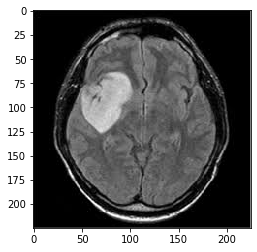

In [83]:
plt.imshow(img_rgb)

# Image Preprocessing steps

1 ) Image Contrasting :Contrast stretching increases the contrast of the image by
stretching the range of intensity values of the image to span
the desired range from 0 to 1

Python/OpenCV can do contrast stretching via the cv2.normalize() method using min_max normalization

In [84]:
norm_img1 = cv2.normalize(img_rgb, None, alpha=0, beta=1.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


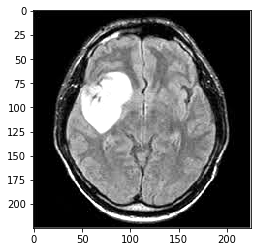

In [85]:
plt.imshow(norm_img1)

Histogram equilization

In [86]:
R,G,B=cv2.split(img_rgb)
output1_R=cv2.equalizeHist(R)
output1_G=cv2.equalizeHist(G)
output1_B=cv2.equalizeHist(B)
output1=cv2.merge((output1_R,output1_G,output1_B))

(array([50139.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         3360.,     0.,     0.,     0.,     0.,     0.,     0.,  2559.,
            0.,     0.,     0.,     0.,     0.,  2400.,     0.,     0.,
            0.,  1776.,     0.,   855.,     0.,   735.,     0.,   732.,
            0.,   666.,   636.,     0.,   642.,   552.,     0.,   522.,
          441.,   531.,   498.,     0.,   450.,   486.,   456.,   345.,
          366.,   477.,   369.,   396.,   354.,   729.,   339.,   363.,
          306.,   375.,   543.,   285.,   453.,   462.,   255.,   447.,
          396.,   387.,   468.,   411.,   417.,   186.,     0.,  1038.,
          411.,   429.,   216.,   450.,   462.,   447.,   267.,   258.,
          606.,   342.,   366.,   360.,   384.,   483.,   462.,     0.,
          678.,     0.,   642.,   630.,     0.,   729.,     0.,   747.,
            0.,   930.,     0.,   918.,     0.,     0.,  1056.,     0.,
            0.,  1038.,     0.,  1044.,     0.,     0.,  1095., 

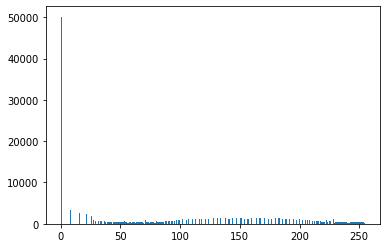

In [87]:
plt.hist(output1.ravel(),256)

Hence histogram is properly equalized

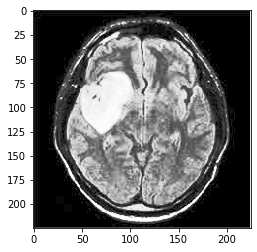

In [88]:
plt.imshow(output1)

Hence histogram equilization gives the better result

2 ) Filter operation

Filter operation is performed on the image to increase the
smoothness, sharpness as well as edge enhancement.
Median filter has been applied in our proposed method
instead of any other filters like mean filter and Gaussian
filter. This is due to the fact that mean filter can reduce the
noise better but it cannot preserve the edge, and the
Gaussian filter preserves the edge but makes the image
blurry . In compare to mean and Gaussian filters,
median filter is effective as a fact that removes the noise at
satisfactory level while preserving the edges. Moreover, it
makes the image less blurry than the Gaussian filter.

First applying High pass filter which is mainly used for edge detection purpose.

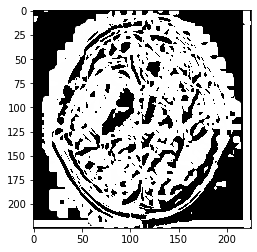

In [90]:
edge_x=cv2.Sobel(output1,-1,dx=1,dy=0,ksize=15,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
edge_y=cv2.Sobel(output1,-1,dx=0,dy=1,ksize=15,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
high_pass_img=edge_x+edge_y
plt.imshow(high_pass_img)

canny edge detector for detecting the edge

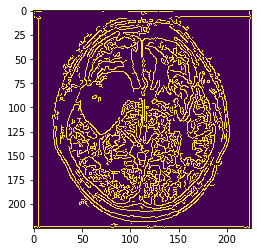

In [93]:
l1=cv2.Canny(output1,50, 300, L2gradient=False)
plt.imshow(l1)

Applying median filter for noise removal

In [94]:
filter_img=cv2.medianBlur(norm_img1,5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


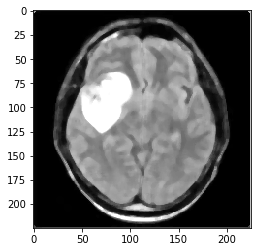

In [95]:
plt.imshow(filter_img)

c ) Segmentation

Segmentation divides the image into regions based on the
similar attributes. Basically, segmentation was performed to
extract important features from the image for further
analysis

During research, it has been found that in RGB gray scale
image only green and blue channels are required to detect
brain tumor. As a result, the threshold based Otsu’s
segmentation was performed only on the resultant image of
green and blue channels and the red channel was discarded.

In [98]:
th=0.9
max_val=255
ret,thresh=cv2.threshold(filter_img,th,max_val,cv2.THRESH_BINARY,cv2.THRESH_OTSU)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


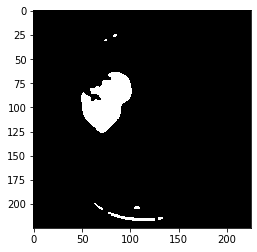

In [99]:
plt.imshow(thresh)

White portion is the tumor region hence we extracted the tumor portion

# Post-processing Steps

1) Morphological operation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


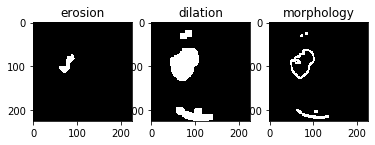

In [101]:
k=np.ones((5,5),np.uint8)
output1=cv2.erode(thresh,k,iterations=3)
output2=cv2.dilate(thresh,k,iterations=3)
output3=cv2.morphologyEx(thresh,cv2.MORPH_GRADIENT,k) 
morph_img=[output1,output2,output3]
title=['erosion','dilation','morphology']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(morph_img[i])
    plt.title(title[i])
plt.show()

1) Feature extraction

In [113]:
resize_img=cv2.resize(output3,None,fx=2,fy=2,interpolation=cv2.INTER_LINEAR)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


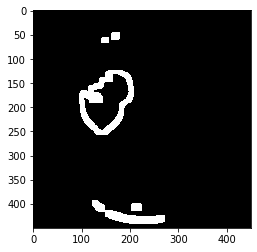

In [114]:
plt.imshow(resize_img)

In [110]:
img_color=cv2.cvtColor(output3,cv2.COLOR_RGB2HSV)

In [111]:
resize_img.shape


(450, 450, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


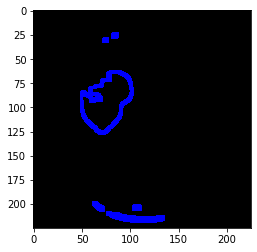

In [112]:
plt.imshow(img_color)

# Area of tumor calculation

In [115]:
img_color.shape

(225, 225, 3)

In [124]:
pixel=225*225

In [125]:
one_pixel=0.264

In [126]:
import math

In [127]:
area_of_tumor=(math.sqrt(pixel)*one_pixel)

In [128]:
area_of_tumor

59.400000000000006

In [130]:
print("the area of the tumor {} in mm square".format(area_of_tumor))

the area of the tumor 59.400000000000006 in mm square
